In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [57]:
dataset=pd.read_csv("Mall_Customers.csv")

In [58]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0.5, 1.0, 'customer data')

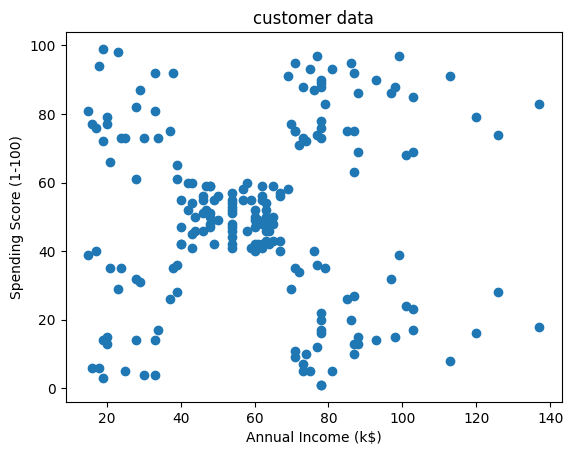

In [59]:
plot.scatter(dataset["Annual Income (k$)"],dataset["Spending Score (1-100)"])
plot.xlabel("Annual Income (k$)")
plot.ylabel("Spending Score (1-100)")
plot.title("customer data")

In [60]:
#Subset of dataset....
x=dataset.iloc[:,[3,4]].values

In [61]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [62]:
# epsilon:   which defines the maximum distance allowed between two points within the same cluster.
              # if esp increase, less no of cluster will be created
# min_samples:  which defines the minimum number of data points required to form a distinct cluster.
# -1 is the Non-core points, outliers...


from sklearn.cluster import DBSCAN
model=DBSCAN(eps=5,min_samples=6)
clustering_label=model.fit_predict(x)
clustering_label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  1, -1, -1,  2,  1,  2,  1, -1,  1,  2,  3,
        2,  1,  2,  1,  2,  3, -1,  3, -1, -1, -1,  1, -1,  3, -1,  3, -1,
        1, -1,  3, -1,  1, -1,  1, -1,  3, -1,  3, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [63]:
from sklearn.metrics import silhouette_score
silhouette_score(x,clustering_label)


np.float64(0.06353533083993718)

In [64]:
#creating table with the exisiting data and append no of clusters with that
supervised=pd.DataFrame(dataset)
supervised["Cluster_Group"]=clustering_label

supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [65]:
supervised.to_csv("dbscan.csv",index=False)

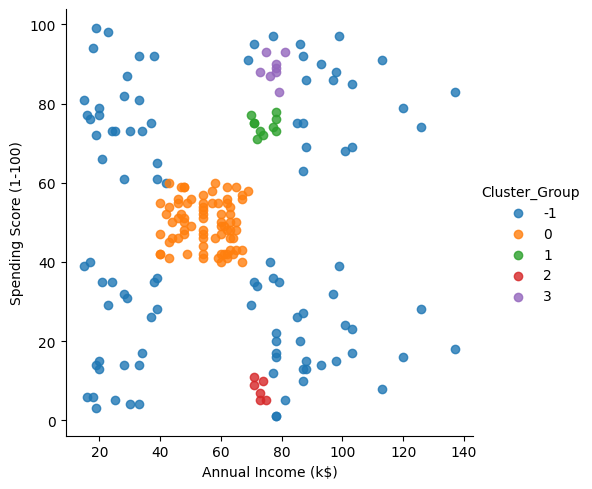

In [66]:
sns.lmplot(supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False)

# -1 are outliers